In [1]:
import numpy as np
import matplotlib.pyplot as plt
from DensiTDA import landmarktools
from numpy import genfromtxt

# Load Species

In [2]:
V = np.array(genfromtxt('datasets/species.csv', delimiter=','))

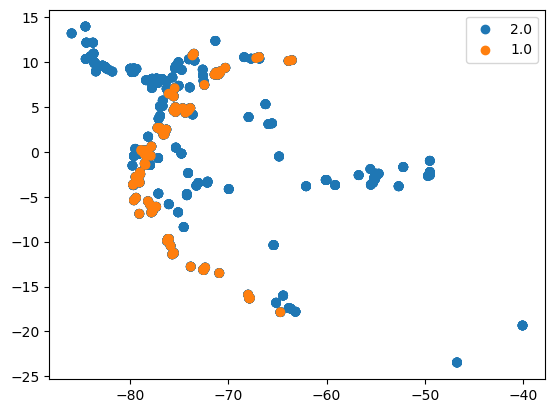

In [3]:
fig, ax = plt.subplots()
for species_type in reversed(list(set(V[:,0]))):
    curr_types = V[V[:,0] == species_type]
    ax.scatter(curr_types[:,1], curr_types[:,2], marker='o', linestyle='', label=species_type)

ax.legend()
plt.show()

In [4]:
X = V[:,1:]

In [5]:
X.shape

(1624, 2)

# Run Max of Gaussians Landmarking Selection Algorithm

In [6]:
# hyperparameters
d = X.shape[1]
h = 1 #np.std(X) * (len(X)) ** (-1 / (d + 4))
A = np.ones(len(X)) / 1624
s = 0.8

# 1. want to use the underlying density to sample points
# 2. Don't use the density in higher dimensional data 
# 3. Instead, use alpha as the acceptance criterian 
candidate_landmarks = X

In [7]:
chosen_landmarks, powers = landmarktools.max_of_gaussians_landmarking(X, A, candidate_landmarks, h, s)

Initializing Distrbution over Candidate Landmark Points:


100%|████████████████████████████████████████| 163/163 [00:01<00:00, 121.59it/s]


Maximizing Gaussians over Landmark Points:


100%|█████████████████████████████████████| 1624/1624 [00:00<00:00, 2539.60it/s]


# Result of Max of Gaussians 

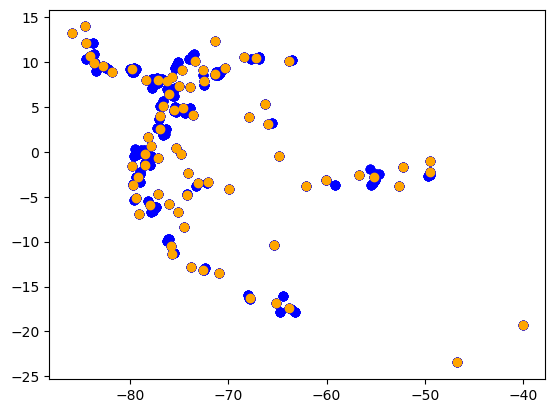

In [8]:
chosen_landmarks = np.array(chosen_landmarks)

plt.scatter(X[:,0], X[:,1], color="blue")
plt.scatter(chosen_landmarks[:,0], chosen_landmarks[:,1], color="orange")
plt.show()

In [9]:
print("Precentage of points selected: ", 100 * len(chosen_landmarks) / len(X))

Precentage of points selected:  4.679802955665025


Initializing Distrbution over Candidate Landmark Points:


100%|████████████████████████████████████████| 163/163 [00:01<00:00, 117.32it/s]


Maximizing Gaussians over Landmark Points:


100%|█████████████████████████████████████| 1624/1624 [00:00<00:00, 2475.38it/s]


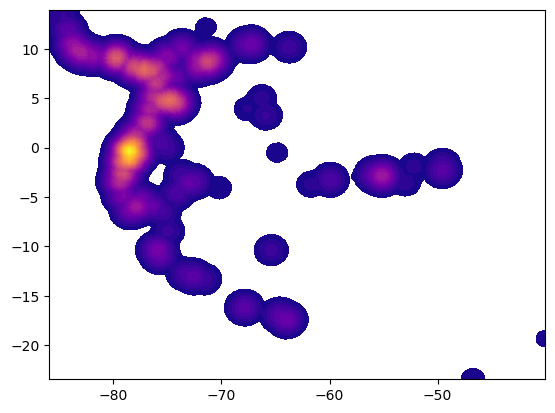

In [10]:
landmarktools.max_of_gaussians_2D_plot(X, A, candidate_landmarks, h, s, cut_off = 0.003)